# Занятие 3. Модели управления запасами

1. Предположим, что у нас есть склад, на который ежедневно поступает товар. Интенсивность поступления товара на склад изменяется в течение дня: начинается со 100 единиц, затем с 8:00 до 12:00 она линейно растет, достигает максимума в 300 единиц в час в 12:00, а затем линейно снижается до 50 единиц в час к 20:00. Поступление товара на склад происходит непрерывно в течение дня. Требуется найти количество товара на складе через 30 минут после начала работы и в конце смены.

2. Предположим, что у нас есть склад, на который ежедневно поступает товар. Интенсивность поступления товара на склад изменяется в течение дня: начинается со 50 единиц, затем с 8:00 до 12:00 она линейно растет, достигает максимума в 200 единиц в час в 12:00, а затем линейно снижается до 100 единиц в час к 20:00. Поступление товара на склад происходит непрерывно в течение дня. Требуется найти количество товара на складе через 30 минут после начала работы и в конце смены.

Запишу переменные для теста заранее

In [2]:
#         start, maximum, decline
first_task = (100, 300, 50)
second_task = (50, 200, 100)

Очень много неточностей, допустим склад открывается в 8 и имеет start единиц, затем достигает максимума и снижается до decline и в 20 00 заканчивает работу.

Ответом на вопрос будет количество единиц в 8 30 и в 20 00. Промежутки в 30 мин

In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [48]:
def plot_intensity(start, maximum, decline):
  to_max = np.linspace(start, maximum, 9)
  to_min = np.linspace(maximum, decline, 17)
  time = [f'{h}:{m}' for h in range(8, 21) for m in ('00', '30')]
  time.pop() # pop 20 30

  plt.scatter(x=8, y=maximum, color='red')
  # plt.axvline(x=8, color='red') # максимум линия
  plt.plot(range(len(to_max)), to_max)
  plt.plot(range(len(to_max) - 1, len(to_max) + len(to_min) - 1), to_min)
  plt.xticks(range(len(time)), time, rotation=60)
  plt.show()

$$
\lim_{запасы \to 0} (запасы - |\text{шаг_30_мин} - прошлый|) >= 0
$$

количество товара на складе через 30 минут после начала работы и в конце смены

In [75]:
def models(start, maximum, decline):
  to_max = np.linspace(start, maximum, 9)
  to_min = np.linspace(maximum, decline, 17)
  all = np.concatenate([to_max, to_min])

  print('Количество товаров на складе через 30 минут после начала работы:', int(all[1]))
  print('Количество товаров на складе в конце смены:', int(all[0]))

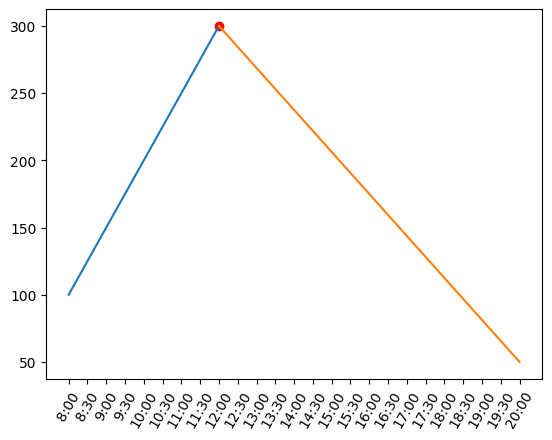

In [76]:
plot_intensity(*first_task)

In [77]:
models(*first_task)

Количество товаров на складе через 30 минут после начала работы: 125
Количество товаров на складе в конце смены: 100


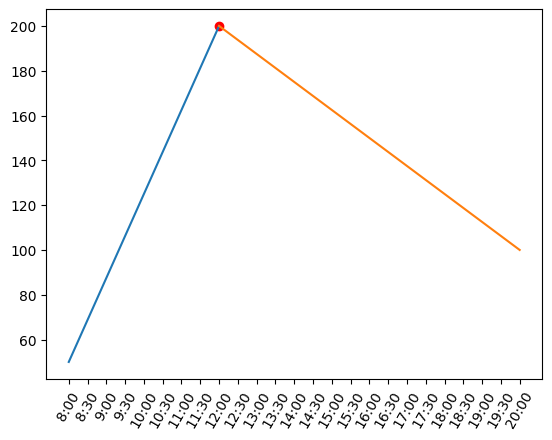

In [78]:
plot_intensity(*second_task)

In [79]:
models(*second_task)

Количество товаров на складе через 30 минут после начала работы: 68
Количество товаров на складе в конце смены: 50
